In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
%matplotlib inline

In [2]:
pp = '/home/marco/PycharmProjects/ini_caltech101/'

In [170]:
import json
import matplotlib.ticker as mtick

fmt = '%3.f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
                             
def plot(history_json, leg_locs=['upper right', 'lower right']):
    with open(history_json) as data_file:    
        data = json.load(data_file)
    
    fig, axs = plt.subplots(1,2, figsize=(20, 10))
    
    if 'val_class_acc' in data:
        print np.mean(data['val_class_acc'],axis=1)
    if 'test_class_acc' in data:
        print np.mean(data['test_class_acc'],axis=1)
    
    mean_loss = np.mean(data['loss'], axis=1)
    mean_val_loss = np.mean(data['val_loss'], axis=1)
    mean_acc = np.mean(data['acc'], axis=1)
    mean_val_acc = np.mean(data['val_acc'], axis=1)
    mean_val_class_acc = np.mean(data['val_class_acc'], axis=1)
    epochs = range(len(mean_loss))
    
    # plotting
    linewidth=2.0
    axs[0].plot(epochs, mean_loss, 'k--', label='Train loss', linewidth=linewidth)
    axs[0].plot(epochs, mean_val_loss, 'k:', label='Validation loss', linewidth=linewidth)
    
    axs[1].plot(epochs, mean_acc, 'k--', label='Train accuracy', linewidth=linewidth)
    axs[1].plot(epochs, mean_val_class_acc, 'k:', label='Validation accuracy', linewidth=linewidth)
    
    # Now add the legend with some customizations.
    for ax, leg_loc in zip([axs[0], axs[1]], leg_locs):
        ax.set_xlabel('Epoch', fontsize=20)
        ax.tick_params(labelsize=18)
        
        legend = ax.legend(loc=leg_loc)

        # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
        frame = legend.get_frame()
        frame.set_facecolor('0.90')

        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize(20)

        for label in legend.get_lines():
            label.set_linewidth(3)  # the legend line width
    
    axs[0].set_ylabel('Cross-Entropy Loss', fontsize=24)
    axs[0].set_ylim(0.0, 5.0)
    
    axs[1].set_ylabel('Accuracy', fontsize=24)
    axs[1].set_ylim(0, 1.0)
    vals = axs[1].get_yticks()
    axs[1].set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
    
    return fig

In [142]:
with open(pp + 'results/2015-12-22_21.50.35_testing_bn_triangluar_cv1_e20_history.json') as data_file:    
    data = json.load(data_file)
    print np.mean(data['val_class_acc'],axis=1)


[ 0.54444741  0.70373197  0.77544009  0.80512194  0.8152652   0.81664949
  0.8171345   0.81824522  0.81824689  0.82024562  0.81916192  0.81761305
  0.82014586  0.82078598  0.82164329  0.81902336  0.8227612   0.82128453
  0.82247162  0.82438951]


[ 0.56979192  0.70888764  0.78471277  0.80489646  0.82075266  0.8224036
  0.82253439  0.82122018  0.82266237  0.82289847  0.82171857  0.82385364
  0.82199427  0.82433796  0.82309061  0.82717096  0.82442403  0.82524422
  0.82735662  0.82661765]
[ 0.82411904]


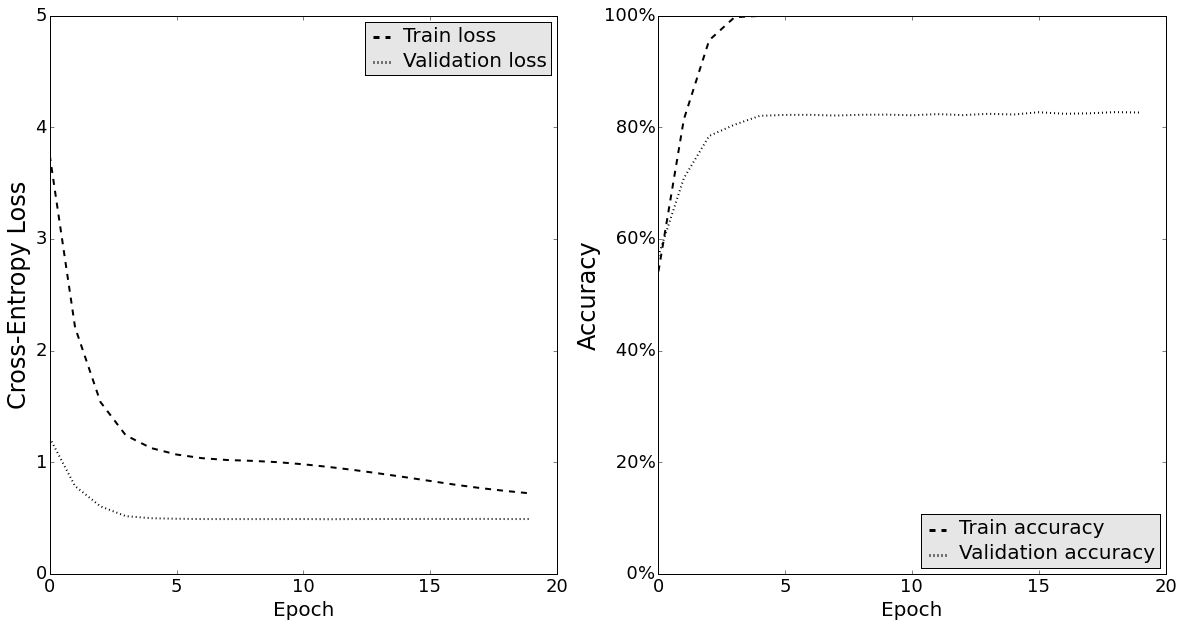

In [171]:
fig= plot(pp + 'results/2015-12-23_05.16.59_testing_class-weight-auto_bn_triangluar_cv1_e20_history.json')
fig.savefig(pp + 'report/images/bn_bias-constraint.png')

[ 0.57564862  0.70126072  0.77497571  0.81114708  0.81839003  0.82396705
  0.82254196  0.82435334  0.82364855  0.82538655  0.82420597  0.82506968
  0.82381317  0.82421323  0.82824242  0.82793097  0.8297315   0.8253853
  0.82895269  0.82920621]
[ 0.82539654]


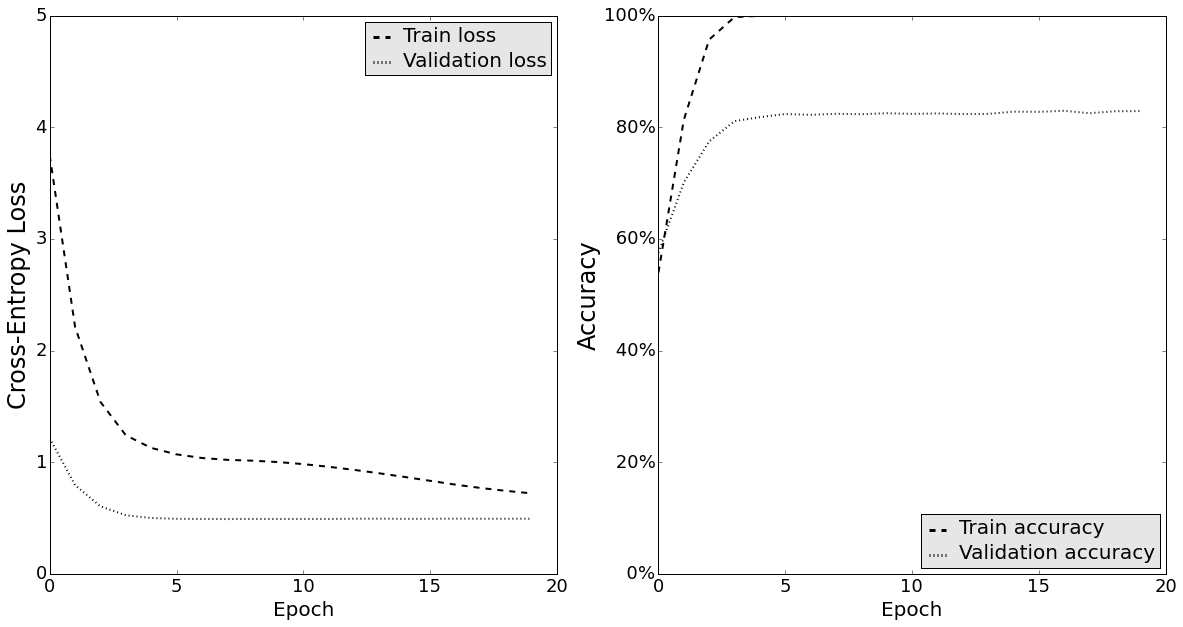

In [172]:
fig= plot(pp + 'results/2015-12-23_15.05.54_class-weight-auto_bn_triangluar_no-bconstraint_cv1_e20_history.json')
fig.savefig(pp + 'report/images/bn_no-bias-constraint.png')

[ 0.29070756  0.39074711  0.49752912  0.536022    0.56481977  0.59424172
  0.61347393  0.61049881  0.61110864  0.62657974  0.62531929  0.63440873
  0.65082819  0.66129171  0.66660627  0.6679585   0.68939969  0.70897021
  0.71427459  0.7304286 ]
[ 0.73975115]


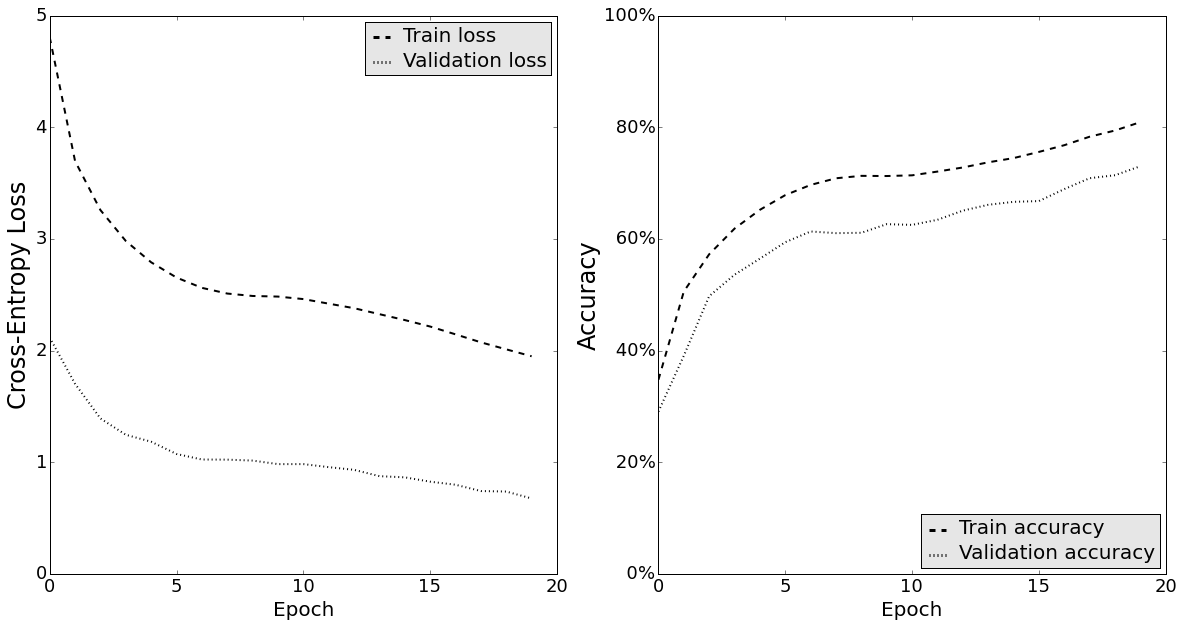

In [173]:
fig = plot(pp + 'results/2015-12-23_20.48.46_class-weight-auto_no-bn_triangluar-0.0001-0.01_cv1_e20_history.json')
fig.savefig(pp + 'report/images/no-bn_bias-constraint.png')

[ 0.46416585  0.62377464  0.71084405  0.74269377  0.76296175  0.76993359
  0.77203362  0.77332819  0.77350666  0.77421364  0.77281141  0.77426402
  0.77349378  0.77592366  0.77915613  0.77541972  0.77827217  0.78057693
  0.77998305  0.78088421]
[ 0.7825943]


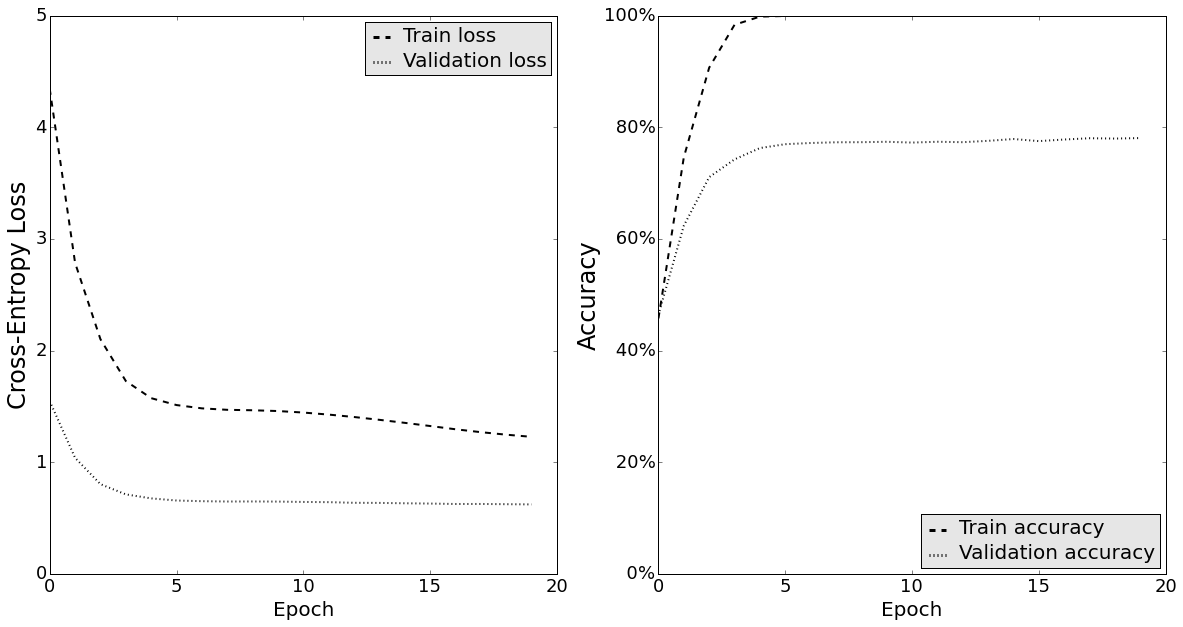

In [174]:
fig = plot(pp + 'results/2015-12-24_04.17.44_class-weight-auto_no-bn_triangluar-0.0001-0.01_no-bconstraint_cv1_e20_history.json')
fig.savefig(pp + 'report/images/no-bn_no-bias-constraint.png')

[ 0.53970457  0.68975417  0.77193935  0.80234875  0.81968243  0.82153511
  0.82261539  0.82320111  0.82415429  0.82382767  0.82438787  0.82421283
  0.82514633  0.82636666  0.82750535  0.82662537  0.82917633  0.8311359
  0.82729684  0.82989426]
[ 0.8222704]


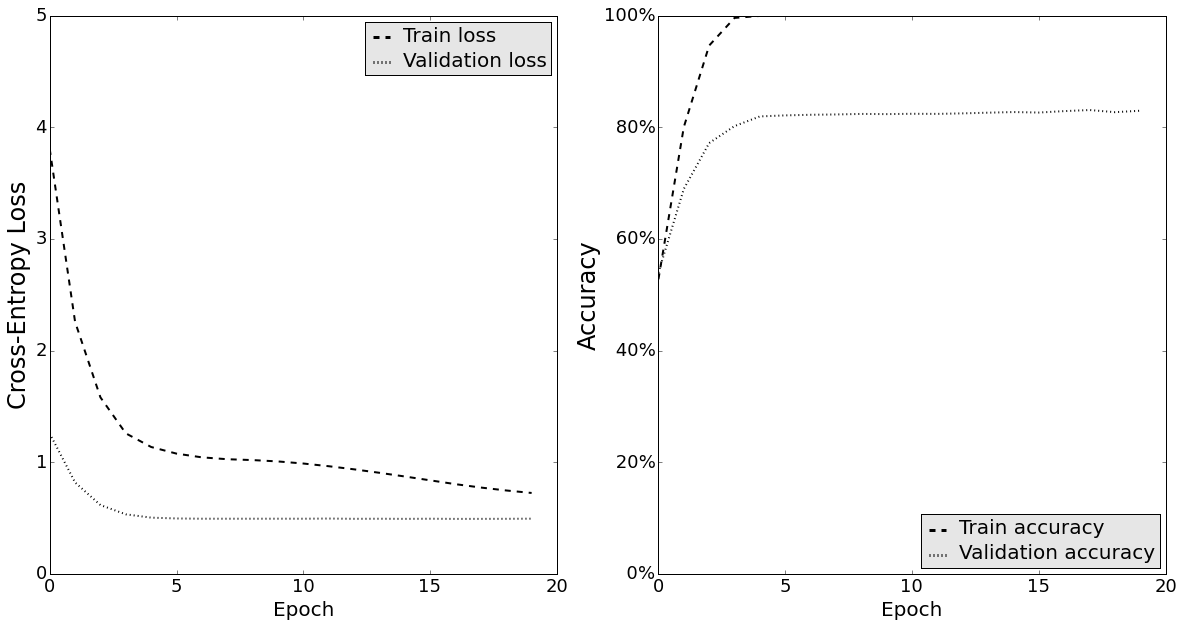

In [175]:
fig = plot(pp + 'results/2015-12-28_05.43.05_conv1-9x9_cv1_e20_history.json')
fig.savefig(pp + 'report/images/conv1-9x9.png')

[ 0.55295751  0.70741986  0.78733555  0.81046351  0.82324613  0.82719885
  0.82746668  0.82535803  0.82578316  0.82740927  0.82601253  0.82723547
  0.82890847  0.82968505  0.82948125  0.82799828  0.82838832  0.82924545
  0.82978089  0.82927581]
[ 0.81862779]


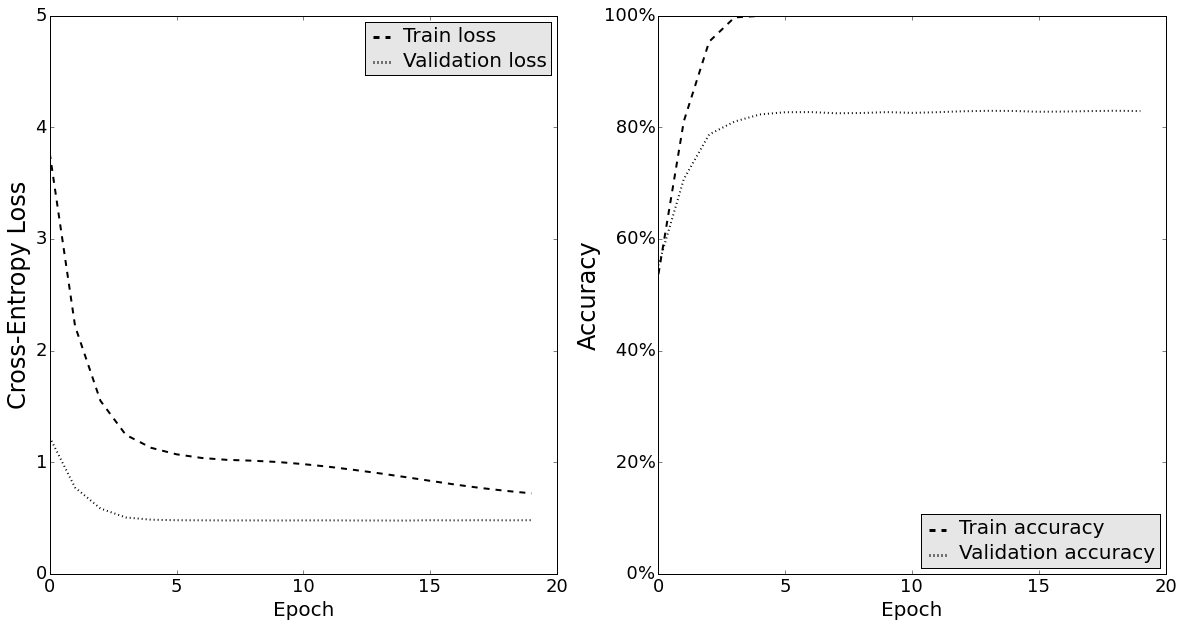

In [176]:
fig = plot(pp + 'results/2015-12-29_06.01.59_bn_triangular_no-data-normalization_cv1_e20_history.json')
fig.savefig(pp + 'report/images/no-data-normalization.png')

[ 0.06416747  0.27598866  0.47548922  0.61348227  0.68036781  0.72427379
  0.75488917  0.77157812  0.77043558  0.77544196  0.77484231  0.77705541
  0.77852074  0.77819806  0.77843416  0.77881407  0.77846503  0.77828248
  0.77751218  0.7790883 ]
[ 0.77395311]


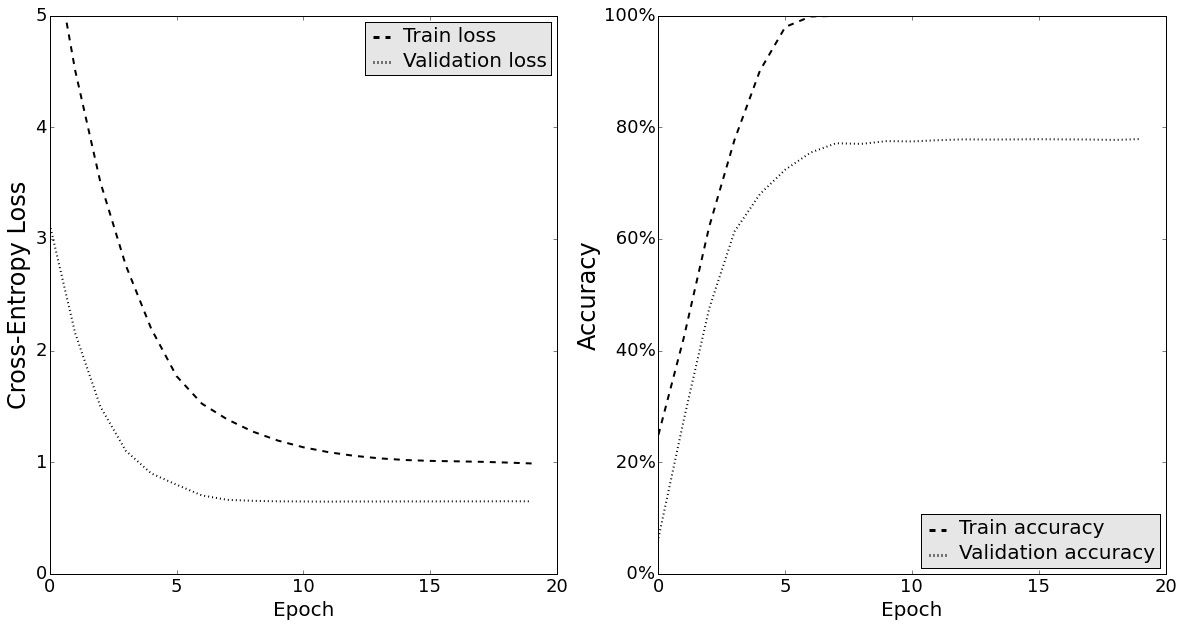

In [178]:
fig = plot(pp + 'results/2015-12-29_18.07.49_bn_triangular-minlr-to-maxlr_cv1_e20_history.json')
fig.savefig(pp + 'report/images/triangular-min-to-max.png')